In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('hed2020_dataset.csv')

df = df.loc[df['label']=='e', ['cap-color-rate','stalk-color-above-ring-rate']]

df

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
...,...,...
5815,1.0,7.0
5819,1.0,7.0
5820,1.0,7.0
5821,1.0,7.0


In [3]:
transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                              ('scaler', StandardScaler())])


processor = ColumnTransformer(transformers=[('cop-color-rate', transformer, ['cap-color-rate']),
                                            ('stalk-coloe-above', transformer, ['stalk-color-above-ring-rate'])])

processed_data = processor.fit_transform(df)

processed_data

array([[-0.73500484, -0.74760802],
       [-0.23417985, -0.74760802],
       [ 0.26664515, -0.74760802],
       ...,
       [-1.23582983,  2.43279003],
       [-1.23582983,  2.43279003],
       [-1.23582983,  2.43279003]])

In [4]:
processor.transformers_

[('cop-color-rate',
  Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())]),
  ['cap-color-rate']),
 ('stalk-coloe-above',
  Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())]),
  ['stalk-color-above-ring-rate'])]

In [5]:
coef = [(i[1].steps[1][1].mean_[0], i[1].steps[1][1].var_[0]**0.5) for i in processor.transformers_]

coef

[(3.4675881792183034, 1.996705460954979),
 (2.4104046242774566, 1.886556308562811)]

In [6]:
kmean = KMeans(n_clusters=5,
               random_state=2020).fit(processed_data)

kmean.cluster_centers_

/Users/jirayuwat/anaconda3/envs/DSandDE/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.41361805, -0.37536859],
       [-1.23582983,  2.30658376],
       [-1.22906193, -0.29354739],
       [ 2.5059661 , -0.74760802],
       [ 1.2093128 ,  1.90272369]])

In [7]:
for idx in range(5):
    centriod_feature_1 = kmean.cluster_centers_[idx][0]*coef[0][1] + coef[0][0]
    centriod_feature_2 = kmean.cluster_centers_[idx][1]*coef[1][1] + coef[1][0]

    print(f"for group {idx} : centriod=({centriod_feature_1}, {centriod_feature_2})")

for group 0 : centriod=(4.293461595380345, 1.7022506456770388)
for group 1 : centriod=(0.9999999999999996, 6.7619047619047645)
for group 2 : centriod=(1.0135135135135078, 1.8566109462063218)
for group 3 : centriod=(8.47126436781609, 1.0000000000000004)
for group 4 : centriod=(5.882229651200753, 6.000000000000002)


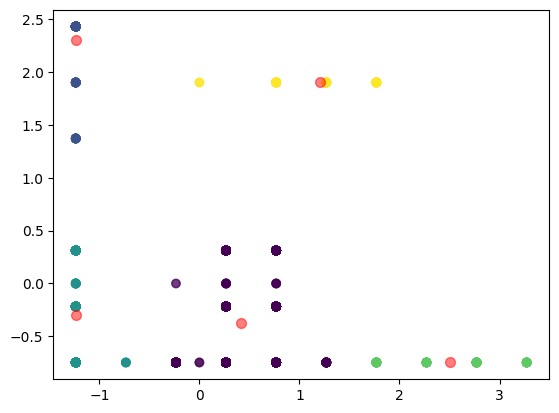

In [8]:
plt.scatter(processed_data[:,0], processed_data[:,1], c=kmean.labels_, alpha=0.5)

for idx in range(5):
    plt.scatter(kmean.cluster_centers_[idx][0], kmean.cluster_centers_[idx][1], s=50, c='red', alpha=0.5)